## Brief Clustering
#### The dataset was used in the 1983 American Statistical Association Exposition. 
#### The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 2 multivalued discrete and 4 continuous variables.

In [51]:
#Import all required libraries
import pandas as pd
import numpy as np
import seaborn as sns
from pandas.plotting import scatter_matrix

In [113]:
cars_df = pd.read_csv("cars-dataset.csv")

### 1. EDA & Pre-processing (Make sure to remove all non-numeric entries from numeric columns) – 5 points

In [114]:
#Total 398 cars info is available
#There is not indication of missing values
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
car name    398 non-null object
cyl         398 non-null int64
disp        398 non-null float64
hp          398 non-null object
wt          398 non-null int64
acc         398 non-null float64
yr          398 non-null int64
mpg         398 non-null float64
dtypes: float64(3), int64(3), object(2)
memory usage: 25.0+ KB


In [115]:
cars_df.head()

,car name,cyl,disp,hp,wt,acc,yr,mpg
0,chevrolet chevelle malibu,8,307.0,130,3504,12.0,70,18.0
1,buick skylark 320,8,350.0,165,3693,11.5,70,15.0
2,plymouth satellite,8,318.0,150,3436,11.0,70,18.0
3,amc rebel sst,8,304.0,150,3433,12.0,70,16.0
4,ford torino,8,302.0,140,3449,10.5,70,17.0


In [93]:
#HP attribute values are integer but the attribute type is shown object
#Could be because of special characters in the column
cars_df.dtypes

car name     object
cyl           int64
disp        float64
hp           object
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [116]:
cars_df['hp'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [117]:
#HP attribute has 6 ? values
cars_df[cars_df['hp'] == '?'].shape

(6, 8)

In [118]:
# Number of ? in hp attribute is around 2% of total rows count.
# dropping off rows with ? in hp attribute
cars_df = cars_df[~(cars_df['hp'] == '?')]

In [119]:
#Change hp attribute type to int
cars_df = cars_df.astype({'hp':int})
cars_df.dtypes

car name     object
cyl           int64
disp        float64
hp            int64
wt            int64
acc         float64
yr            int64
mpg         float64
dtype: object

In [120]:
cars_df.drop_duplicates()
cars_df.shape

(392, 8)

In [121]:
#Setting car name as dataset index
#cars_df.set_index('car name', inplace=True)

# Dropping categorical column car name
cars_df.drop(columns="car name", inplace=True)
cars_df.head()

,cyl,disp,hp,wt,acc,yr,mpg
0,8,307.0,130,3504,12.0,70,18.0
1,8,350.0,165,3693,11.5,70,15.0
2,8,318.0,150,3436,11.0,70,18.0
3,8,304.0,150,3433,12.0,70,16.0
4,8,302.0,140,3449,10.5,70,17.0


In [122]:
#No attributes have negative values
cars_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cyl,392.0,5.471939,1.705783,3.0,4.000,4.00,8.000,8.0
disp,392.0,194.411990,104.644004,68.0,105.000,151.00,275.750,455.0
hp,392.0,104.469388,38.491160,46.0,75.000,93.50,126.000,230.0
wt,392.0,2977.584184,849.402560,1613.0,2225.250,2803.50,3614.750,5140.0
acc,392.0,15.541327,2.758864,8.0,13.775,15.50,17.025,24.8
yr,392.0,75.979592,3.683737,70.0,73.000,76.00,79.000,82.0
mpg,392.0,23.445918,7.805007,9.0,17.000,22.75,29.000,46.6


### 2. Use pair plot or scatter matrix to visualize how the different variables are related 
#### (Hint: The amount of Gaussian curves in the plot should give a visual identification of different clusters existing in the dataset) – 5 points

 Displacement (Disp) has **high correlation** with horsepower (HP) and Weight (Wt)<br>
 Miles per gallon (MPG) is having **negative correlation** with Displacement(Disp), Horsepower(HP) and Weight (Wt)<br>
 Relation of Acceleration (Acc) with MPG and Wt **is cluster**, not clear relation<br>
 Pairplot **gaussian curves of Cyl** indicate that **minimum 3 clusters** could be created 

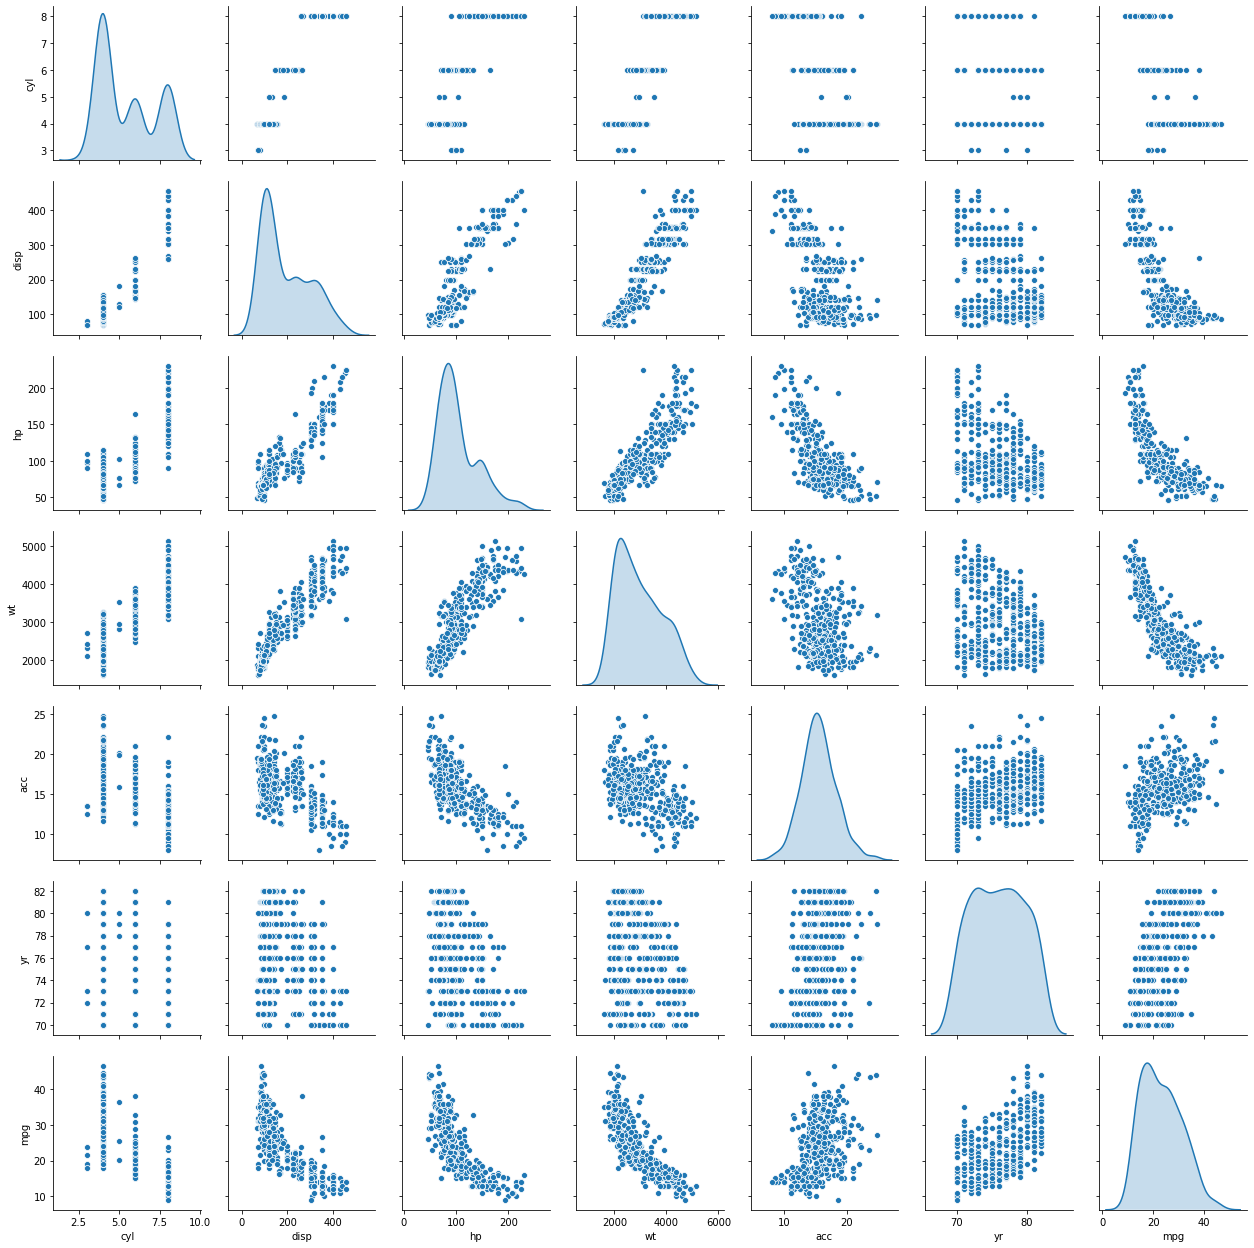

In [55]:
# Pair plot to analyse relation between attributes 
sns.pairplot(cars_df, diag_kind = 'kde')

### 3. Use K Means or Hierarchical clustering to find out the optimal number of clusters in the data. Identify and separate the clusters (10 points)

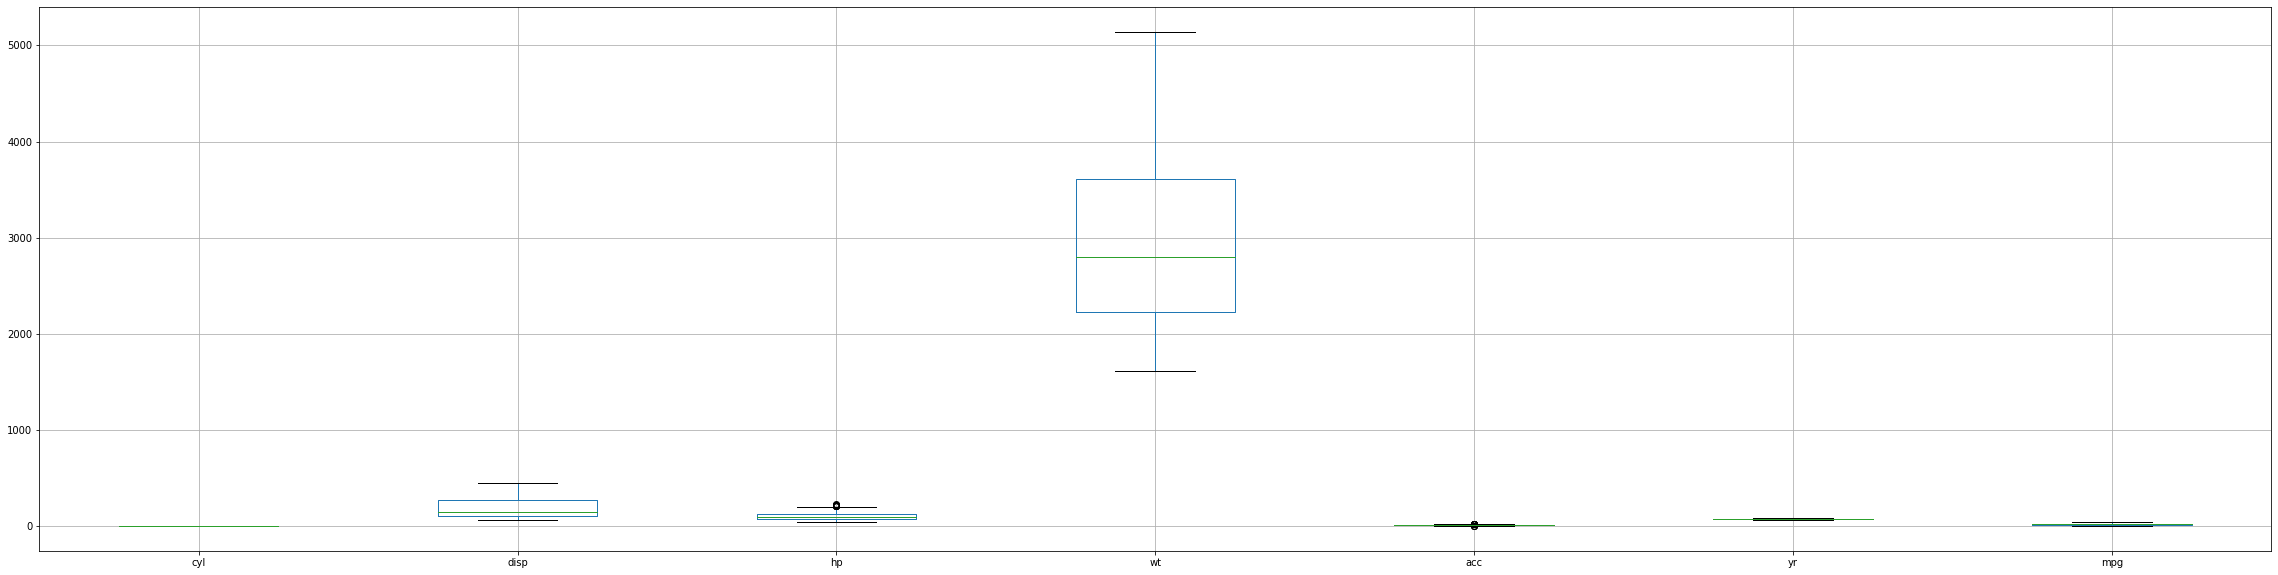

In [123]:
#Data set has values with different scales
cars_df.boxplot(figsize=(40,10))

In [124]:
# Using KMeans clustering to start with, one feature has higher dimensional value
# KMeans cluster data points based on mean value hence standardizing the data using zscore
from scipy.stats import zscore
cars_df_zscore = cars_df.apply(zscore)

In [125]:
clusters_count = range( 1, 10)

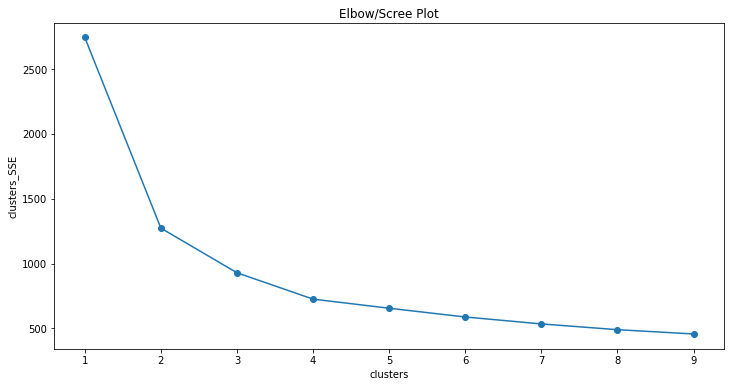

In [126]:
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt

cluster_SSE = []
for num_clusters in clusters_count:
    kmeans_model = KMeans( num_clusters, random_state = 1) #With default n_init value
    kmeans_model.fit(cars_df_zscore)
    cluster_SSE.append(kmeans_model.inertia_) #Cature inertia to find optimal clusters count for the given data set
    
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "clusters":clusters_count, "clusters_SSE": cluster_SSE} )

# Elbow plot
plt.figure(figsize=(12,6))
plt.title('Elbow/Scree Plot')
plt.xlabel('clusters')
plt.ylabel('clusters_SSE')
plt.plot( clusters_df.clusters, clusters_df.clusters_SSE, marker = "o" )

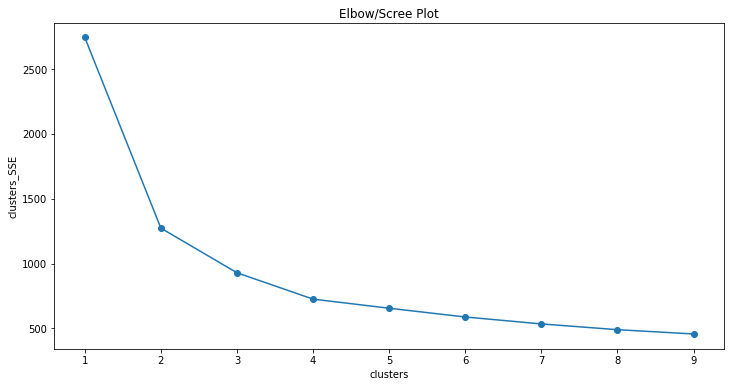

In [127]:
cluster_SSE = []
for num_clusters in clusters_count:
    kmeans_model = KMeans( num_clusters, random_state = 1, max_iter=50) #With default n_init value
    kmeans_model.fit(cars_df_zscore)
    cluster_SSE.append(kmeans_model.inertia_) #Cature inertia to find optimal clusters count for the given data set
    
# combine the cluster_range and cluster_errors into a dataframe by combining them
clusters_df = pd.DataFrame( { "clusters":clusters_count, "clusters_SSE": cluster_SSE} )

# Elbow plot
plt.figure(figsize=(12,6))
plt.title('Elbow/Scree Plot')
plt.xlabel('clusters')
plt.ylabel('clusters_SSE')
plt.plot( clusters_df.clusters, clusters_df.clusters_SSE, marker = "o" )

SSE between cluster size 1 to 2 is drastic reduce, SSE of cluster size 2 is far less than SSE of cluster size 1<br>
SSE of cluster with size 3 is less than SSE of cluster with size 2, but not as drastic fall as difference between 1 and 2<br>
After cluster size 4, SSE difference is almost constant<br>
**Hence considering optimal clusters count as 4**

In [128]:
import pylab as pl

In [139]:
#Trying with K value 3
kmeans_clusters3 = KMeans( n_clusters = 3, random_state = 1 )
kmeans_clusters3.fit(cars_df_zscore)
prediction_3 = kmeans_clusters3.predict(cars_df_zscore)
cars_df3 = cars_df
cars_df3["GROUP"] = prediction_3
cars_df3.groupby("GROUP").count()

,cyl,disp,hp,wt,acc,yr,mpg
GROUP,,,,,,,
0,202,202,202,202,202,202,202
1,95,95,95,95,95,95,95
2,95,95,95,95,95,95,95


In [140]:
#Trying with K value 4
kmeans_clusters4 = KMeans( n_clusters = 4, random_state = 1 )
kmeans_clusters4.fit(cars_df_zscore)
prediction_4 = kmeans_clusters4.predict(cars_df_zscore)
cars_df4 = cars_df
cars_df4["GROUP"] = prediction_4
cars_df4.groupby("GROUP").count()

,cyl,disp,hp,wt,acc,yr,mpg
GROUP,,,,,,,
0,94,94,94,94,94,94,94
1,89,89,89,89,89,89,89
2,100,100,100,100,100,100,100
3,109,109,109,109,109,109,109


In [141]:
#Trying with K value 5
kmeans_clusters5 = KMeans( n_clusters = 5, random_state = 1 )
kmeans_clusters5.fit(cars_df_zscore)
prediction_5 = kmeans_clusters5.predict(cars_df_zscore)
cars_df5 = cars_df
cars_df5["GROUP"] = prediction_5
cars_df5.groupby("GROUP").count()

,cyl,disp,hp,wt,acc,yr,mpg
GROUP,,,,,,,
0,78,78,78,78,78,78,78
1,95,95,95,95,95,95,95
2,60,60,60,60,60,60,60
3,78,78,78,78,78,78,78
4,81,81,81,81,81,81,81


Both cluster size 4 and 5 have almost equal distribution of data points<br>
**Going ahead with clusters count 4** as its first number that gave similar distribution of data points

### 4. Use linear regression model on different clusters separately and print the coefficients of the models individually (10 points)

In [148]:
from sklearn.linear_model import LinearRegression

In [163]:
cluster1_df = cars_df4[cars_df4.GROUP == 1]
cluster2_df = cars_df4[cars_df4.GROUP == 2]
cluster3_df = cars_df4[cars_df4.GROUP == 3]
cluster4_df = cars_df4[cars_df4.GROUP == 4]

In [164]:
cluster1_df.drop(columns=('GROUP'), axis=1, inplace=True)
cluster2_df.drop(columns=('GROUP'), axis=1, inplace=True)
cluster3_df.drop(columns=('GROUP'), axis=1, inplace=True)
cluster4_df.drop(columns=('GROUP'), axis=1, inplace=True)

In [171]:
X1 = cluster1_df.drop('mpg', axis=1)
y1 = cluster1_df['mpg']
X2 = cluster2_df.drop('mpg', axis=1)
y2 = cluster2_df['mpg']
X3 = cluster3_df.drop('mpg', axis=1)
y3 = cluster3_df['mpg']
X4 = cluster4_df.drop('mpg', axis=1)
y4 = cluster4_df['mpg']

In [172]:
regression_model1 = LinearRegression()
regression_model1.fit(X1, y1)
regression_model2 = LinearRegression()
regression_model2.fit(X2, y2)
regression_model3 = LinearRegression()
regression_model3.fit(X3, y3)
regression_model4 = LinearRegression()
regression_model4.fit(X4, y4)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [175]:
print("Cluster1 score - ", regression_model1.score(X1, y1))
print("Cluster2 score - ", regression_model2.score(X2, y2))
print("Cluster3 score - ", regression_model3.score(X3, y3))
print("Cluster4 score - ", regression_model4.score(X4, y4))

Cluster1 score -  0.5687782017419327
Cluster2 score -  0.5134235867412882
Cluster3 score -  0.6136681250808945
Cluster4 score -  0.30620218650729014


In [184]:
#Coefficients of the cluster1
for idx, col_name in enumerate(X1.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model1.coef_[idx]))

The coefficient for cyl is 0.0
The coefficient for disp is -0.004470970590523673
The coefficient for hp is -0.0190203595564969
The coefficient for wt is -0.0012141252642696085
The coefficient for acc is -0.4846365529695642
The coefficient for yr is 0.3933185942397748


In [185]:
#Coefficients of the cluster12
for idx, col_name in enumerate(X2.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model2.coef_[idx]))

The coefficient for cyl is -0.06503249111319757
The coefficient for disp is 0.008898371416262683
The coefficient for hp is -0.09946754470583667
The coefficient for wt is -0.0041346509366454644
The coefficient for acc is -0.7174018980330529
The coefficient for yr is 0.6780413883937471


In [186]:
#Coefficients of the cluster3
for idx, col_name in enumerate(X3.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model3.coef_[idx]))

The coefficient for cyl is 4.803162303350593
The coefficient for disp is -0.0689442759534784
The coefficient for hp is -0.01486809357177789
The coefficient for wt is -0.005916210270407327
The coefficient for acc is -0.17039545663575525
The coefficient for yr is 0.20691419700946667


In [187]:
#Coefficients of the cluster1
for idx, col_name in enumerate(X4.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model4.coef_[idx]))

The coefficient for cyl is 0.7414395898563684
The coefficient for disp is 0.0032317299124153954
The coefficient for hp is -0.024874754298122383
The coefficient for wt is -0.003305915000984277
The coefficient for acc is 0.007886679922398505
The coefficient for yr is 0.37775216535066275
